In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
datos = pd.read_csv('experimentacion.csv', sep=";")
datos['filename'] = [d.split('/')[-1] for d in datos['filename']]
datos[" tipo"] = [d[0] for d in datos['filename']]
datos['optimo'] = [680, 2827, 2339,3552,1407,1166,1843, 178294,102421,100153,176828,100429,44562,180646,44877,45746,12681,11577,8436,24930,23307,22379,1698,1158,1360,3235,2339,2623]
datos['min_cost'] = datos[['greedy1_cost', 'greedy2_cost', ' random_cost', ' relocate(random)_cost','swap(greedy1)_cost', 'swap(greedy2)_cost',' swap(random)_cost', 'vnd(greedy2)_cost', 'vnd(random)_cost']].min(axis=1)
datos

,filename,tipo,stores,selles,greedy1_cost,greedy2_cost,random_cost,relocate(random)_cost,swap(greedy1)_cost,swap(greedy2)_cost,...,g2_time,rand_time,rel_time,swap_G1_time,swap_G2_time,swap_rand_time,vnd_G2_time,vnd_rand_time,optimo,min_cost
0,real_instance,r,310,1100,788.395,754.299,10828.0,790.388,726.596,716.5,...,1917060.0,443,3779290.0,2595940.0,1947660.0,25399800.0,2312530.0,6609240.0,680,709.8
1,b10200,b,10,200,8714.000,7735.000,9589.0,9589.000,8254.000,7446.0,...,3209.0,11,27.0,32695.0,21576.0,78648.0,24488.0,81448.0,2827,6295.0
2,b20200,b,20,200,3652.000,3942.000,8022.0,7337.000,3355.000,3750.0,...,5287.0,11,380.0,22920.0,16372.0,90182.0,33227.0,90821.0,2339,2397.0
3,b05200,b,5,200,8839.000,8537.000,9570.0,9570.000,8272.000,8395.0,...,1871.0,10,13.0,29318.0,8747.0,52596.0,9740.0,54153.0,3552,7285.0
4,b10100,b,10,100,2142.000,2888.000,4334.0,4334.000,1976.000,2732.0,...,829.0,5,13.0,3374.0,2489.0,10483.0,4362.0,12508.0,1407,1454.0
5,b20100,b,20,100,1678.000,1442.000,3514.0,1212.000,1525.000,1374.0,...,1320.0,5,2129.0,2330.0,1178.0,11283.0,2519.0,3201.0,1166,1211.0
6,b05100,b,5,100,5323.000,4795.000,6281.0,6281.000,5027.000,4756.0,...,455.0,7,6.0,3724.0,583.0,8095.0,945.0,8482.0,1843,4374.0
7,e401600,e,40,1600,3600890.000,3873830.000,982150.0,982150.000,3576880.000,3868170.0,...,571823.0,118,739.0,13809300.0,5826890.0,53943600.0,5897130.0,54231700.0,178294,942797.0
8,e15900,e,15,900,1904540.000,2139240.000,636138.0,636138.000,1894290.000,2137580.0,...,83587.0,56,173.0,2849100.0,879711.0,9040670.0,901437.0,9078440.0,102421,604299.0
9,e60900,e,60,900,1886390.000,2014080.000,411512.0,405482.000,1871680.000,2005290.0,...,263930.0,77,2661.0,2956460.0,1858100.0,10587400.0,1908670.0,10672300.0,100153,387609.0


In [9]:
#datos['greedy1_cost'] >= datos['swap(greedy1)_cost']
#datos['greedy2_cost'] >= datos['swap(greedy2)_cost']
#datos[' random_cost'] >= datos[' swap(random)_cost']
#datos[' random_cost'] >= datos[' relocate(random)_cost']
#datos['greedy2_cost'] >= datos['vnd(greedy2)_cost']
#datos[' random_cost'] >= datos['vnd(random)_cost']

In [22]:
datos2 = pd.read_csv('experimentacion2.csv', sep=",")
datos2['filename'] = [d.split('/')[-1] for d in datos2['filename']]
datos2[" tipo"] = [d[0] for d in datos2['filename']]
datos2['optimo'] = [680, 2827, 2339,3552,1407,1166,1843, 178294,102421,100153,176828,100429,44562,180646,44877,45746,12681,11577,8436,24930,23307,22379,1698,1158,1360,3235,2339,2623]
datos2['min_cost'] = datos2[['greedy1_cost', 'greedy2_cost', ' random_cost', ' relocate(random)_cost','swap(greedy1)_cost', 'swap(greedy2)_cost',' swap(random)_cost', 'vnd(greedy2)_cost', 'vnd(random)_cost', 'grasp_cost']].min(axis=1)

#filtra por tipo
datos_a = datos2[datos2[' tipo'] == 'a']
datos_b = datos2[datos2[' tipo'] == 'b']
datos_e = datos2[datos2[' tipo'] == 'e']
datos_r = datos2[datos2[' tipo'] == 'r']

Text(0, 0.5, 'Costo')

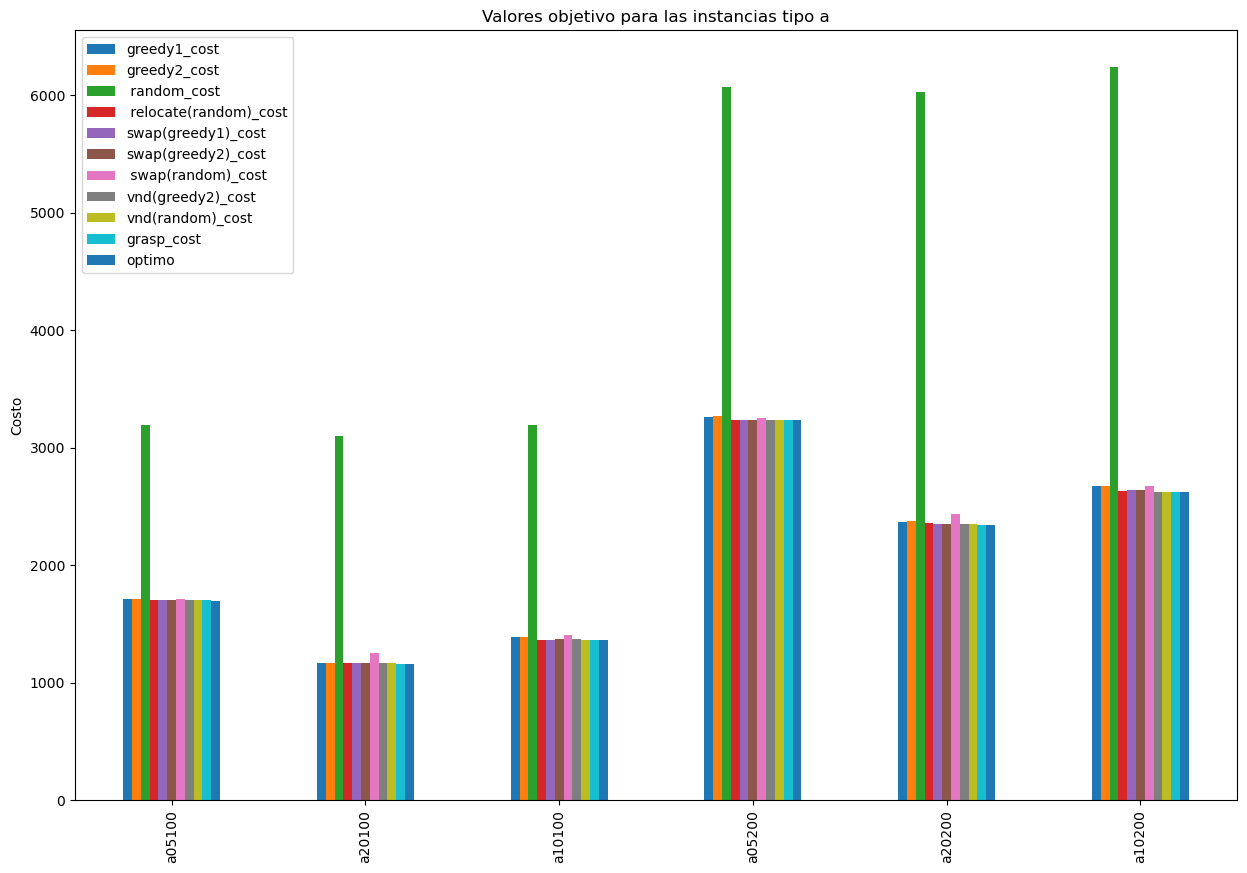

In [27]:
datos_a.plot.bar(x="filename", y=['greedy1_cost', 'greedy2_cost', ' random_cost', ' relocate(random)_cost','swap(greedy1)_cost', 'swap(greedy2)_cost',' swap(random)_cost', 'vnd(greedy2)_cost', 'vnd(random)_cost',"grasp_cost",'optimo'], figsize=(15,10))
plt.title('Valores objetivo para las instancias tipo a')
plt.xlabel('')
plt.ylabel('Costo')

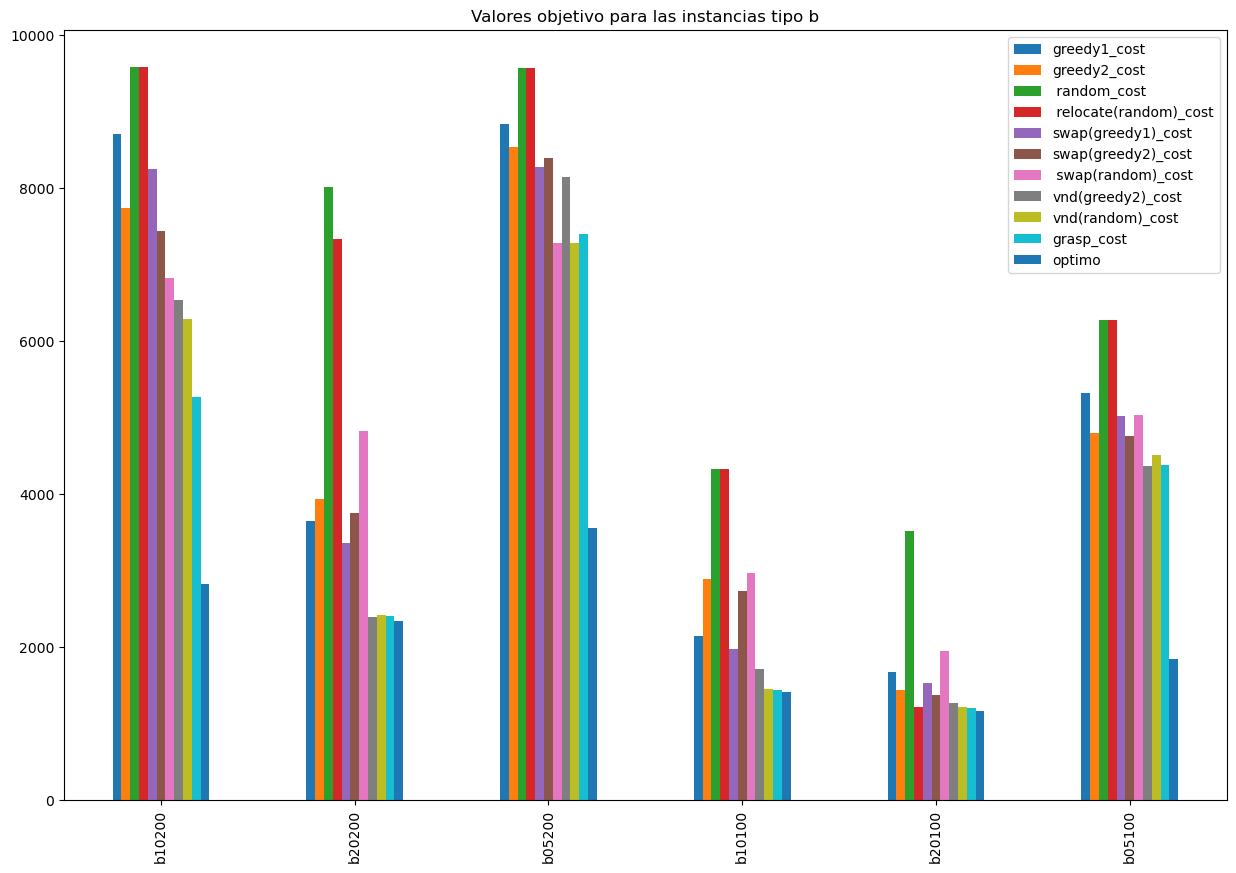

In [28]:
datos_b.plot.bar(x="filename", y=['greedy1_cost', 'greedy2_cost', ' random_cost', ' relocate(random)_cost','swap(greedy1)_cost', 'swap(greedy2)_cost',' swap(random)_cost', 'vnd(greedy2)_cost', 'vnd(random)_cost',"grasp_cost",'optimo'], figsize=(15,10))
plt.title('Valores objetivo para las instancias tipo b')
plt.xlabel('')
plt.show()

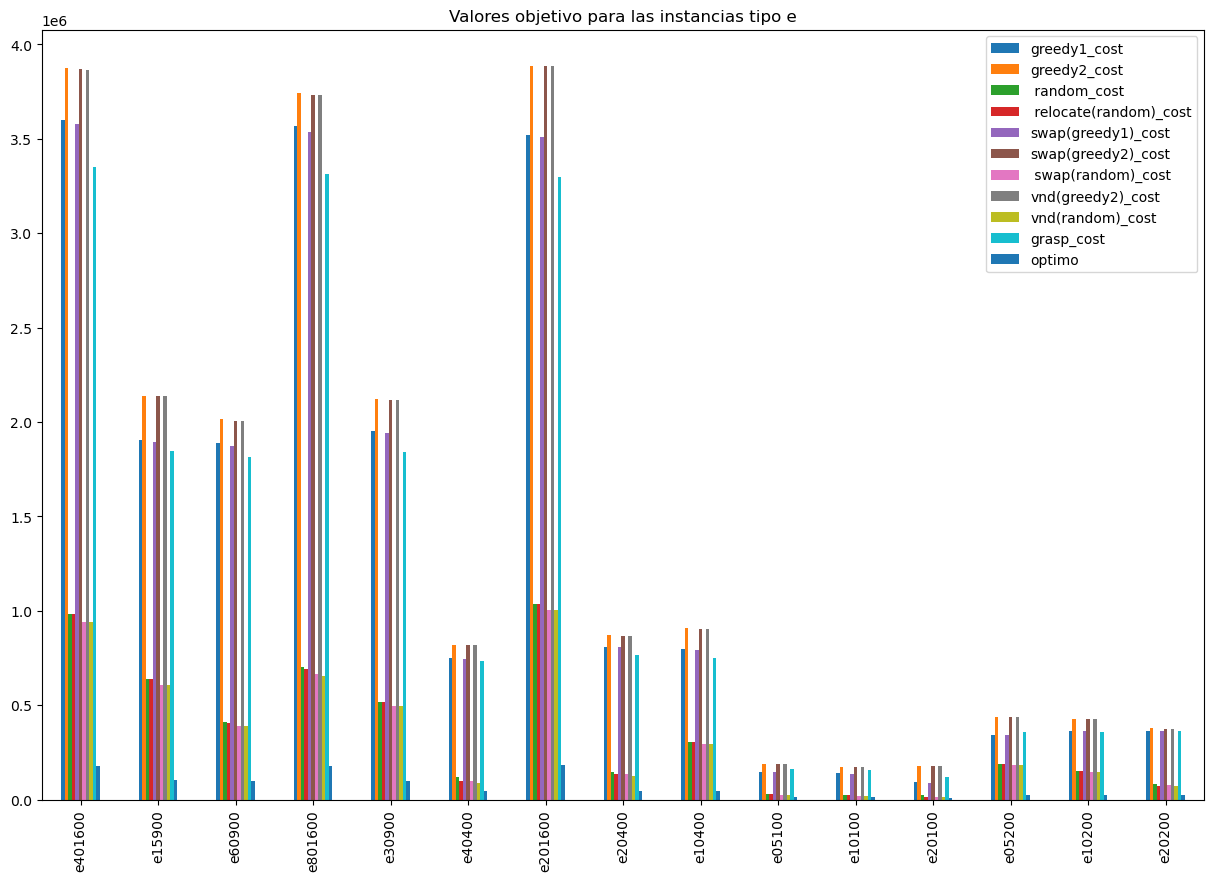

In [29]:
datos_e.plot.bar(x="filename", y=['greedy1_cost', 'greedy2_cost', ' random_cost', ' relocate(random)_cost','swap(greedy1)_cost', 'swap(greedy2)_cost',' swap(random)_cost', 'vnd(greedy2)_cost', 'vnd(random)_cost',"grasp_cost",'optimo'], figsize=(15,10))
plt.title('Valores objetivo para las instancias tipo e')
plt.xlabel('')
plt.show()

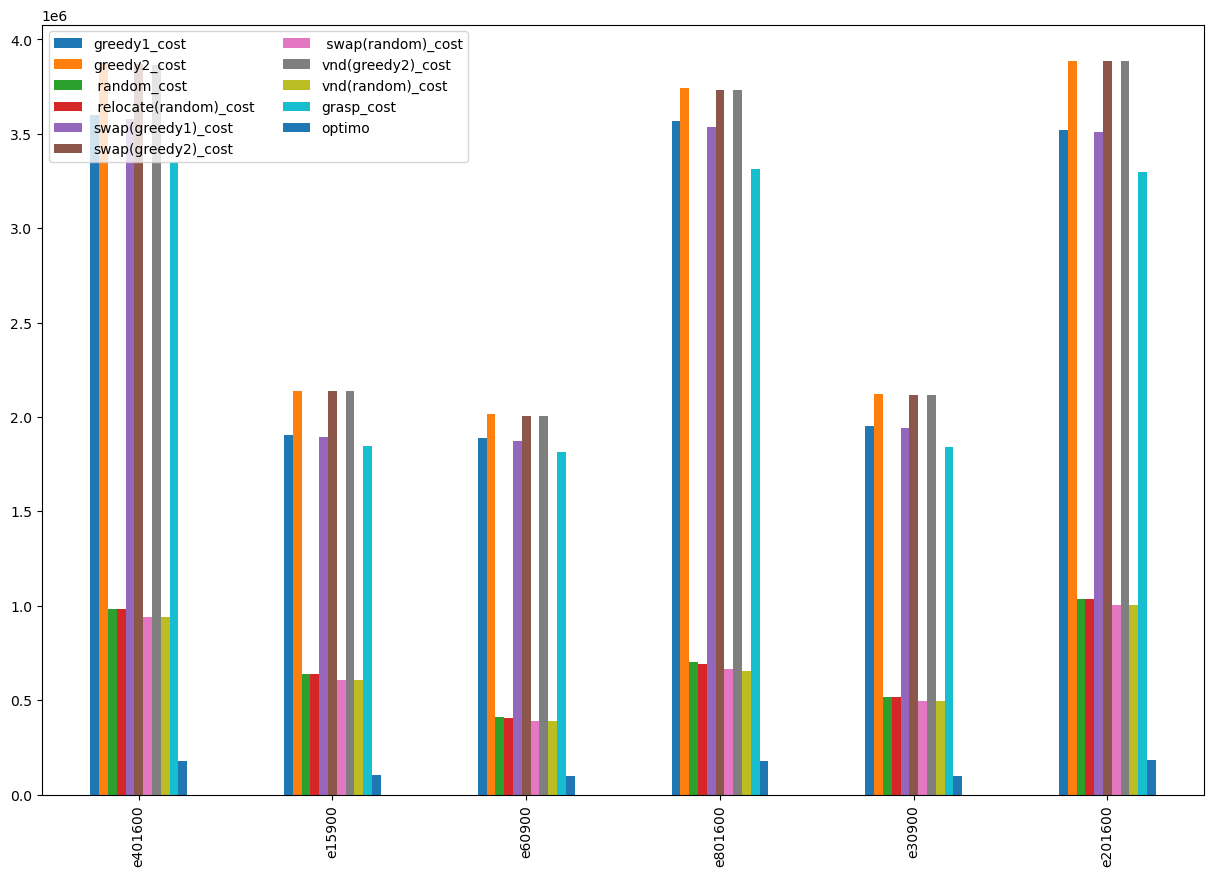

In [114]:
#agarrar los datos de datos_e con selles = 900 y 1600
datos_e_filtered = datos_e[(datos_e[' selles'] == 900) | (datos_e[' selles'] == 1600)]

datos_e_filtered.plot.bar(x="filename", y=['greedy1_cost', 'greedy2_cost', ' random_cost', ' relocate(random)_cost','swap(greedy1)_cost', 'swap(greedy2)_cost',' swap(random)_cost', 'vnd(greedy2)_cost', 'vnd(random)_cost',"grasp_cost",'optimo'], figsize=(15,10))
plt.legend(ncol=2, loc="upper left")
plt.xlabel('')
plt.show()




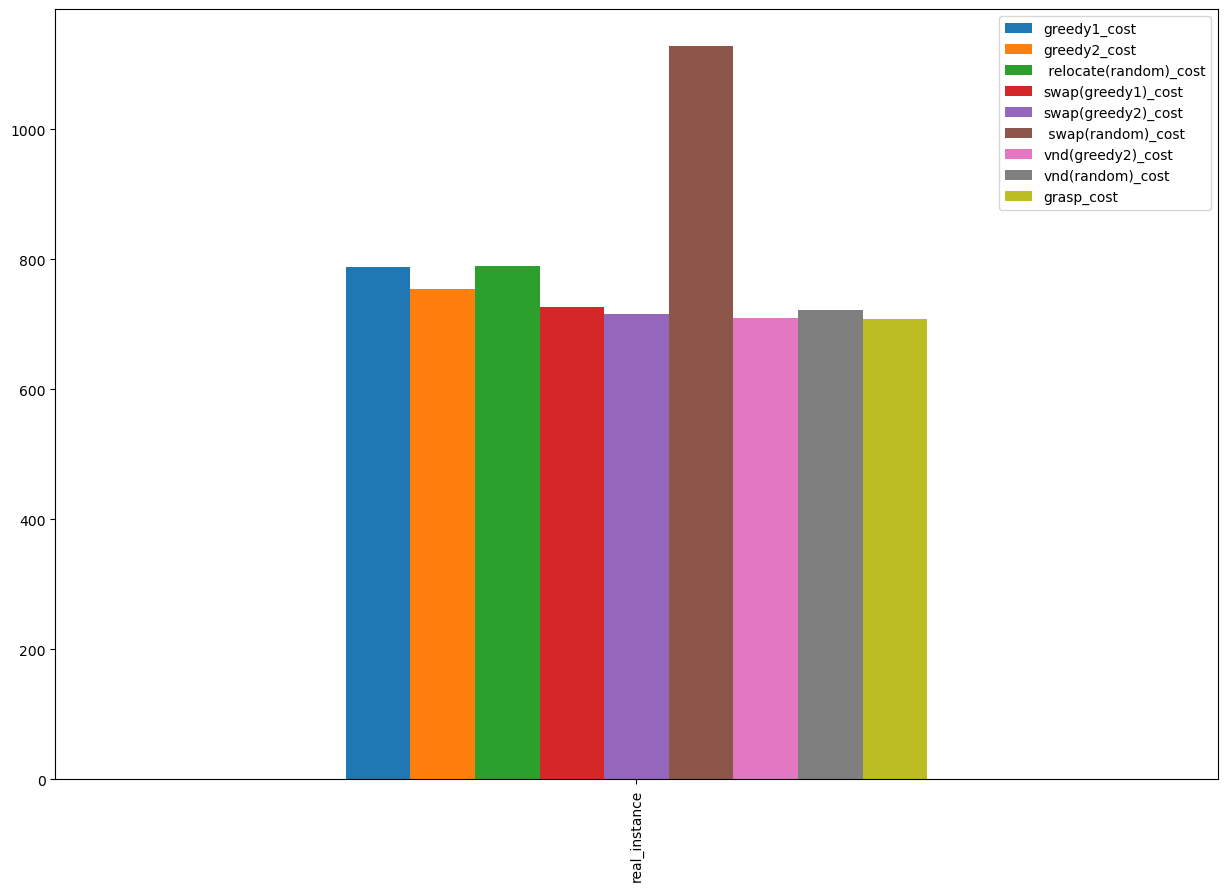

In [121]:
datos_r.plot.bar(x="filename", y=['greedy1_cost', 'greedy2_cost', ' relocate(random)_cost','swap(greedy1)_cost', 'swap(greedy2)_cost',' swap(random)_cost', 'vnd(greedy2)_cost', 'vnd(random)_cost',"grasp_cost"], figsize=(15,10))
plt.xlabel('')
plt.show()

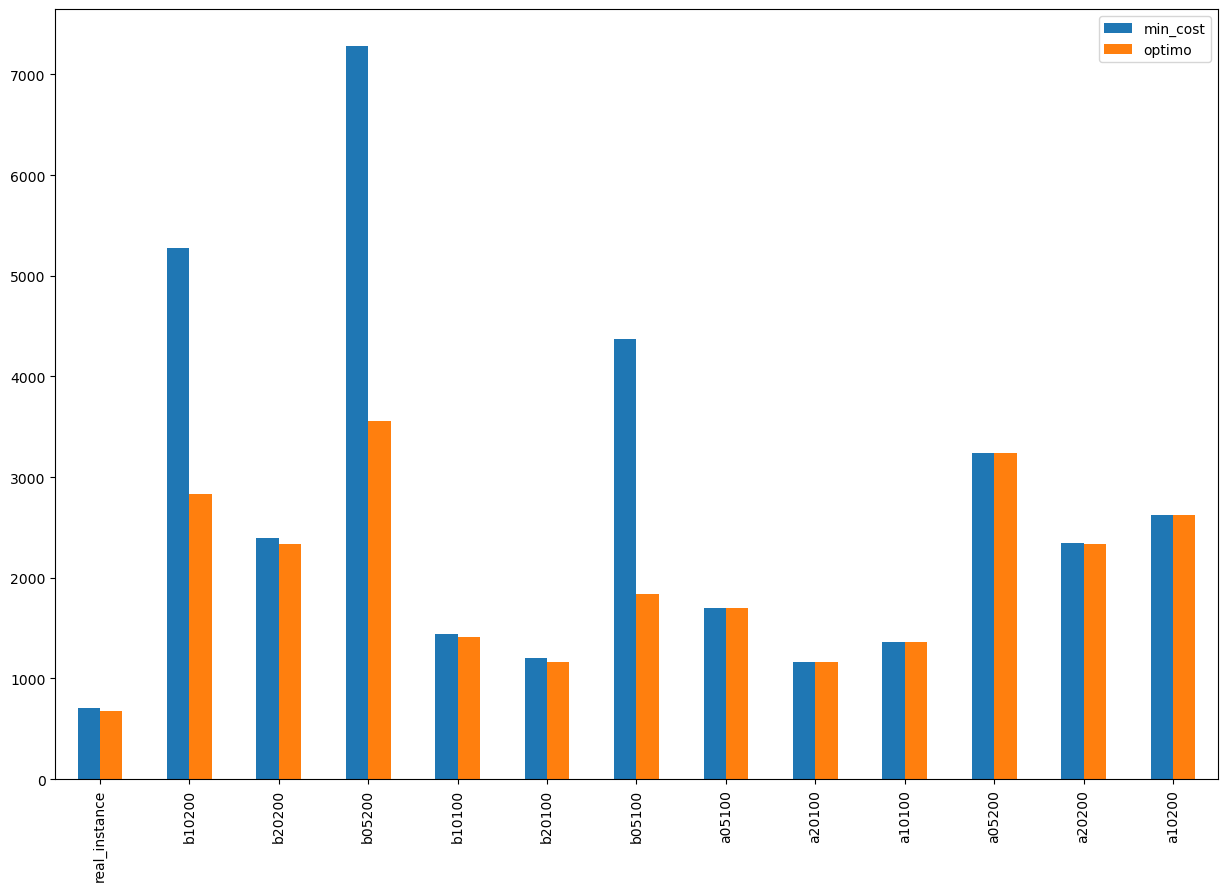

In [116]:
datos_sin_e = datos2[datos2[' tipo'] != 'e']

datos_sin_e.plot.bar(x="filename", y=['min_cost','optimo'], figsize=(15,10))
plt.xlabel('')
plt.show()

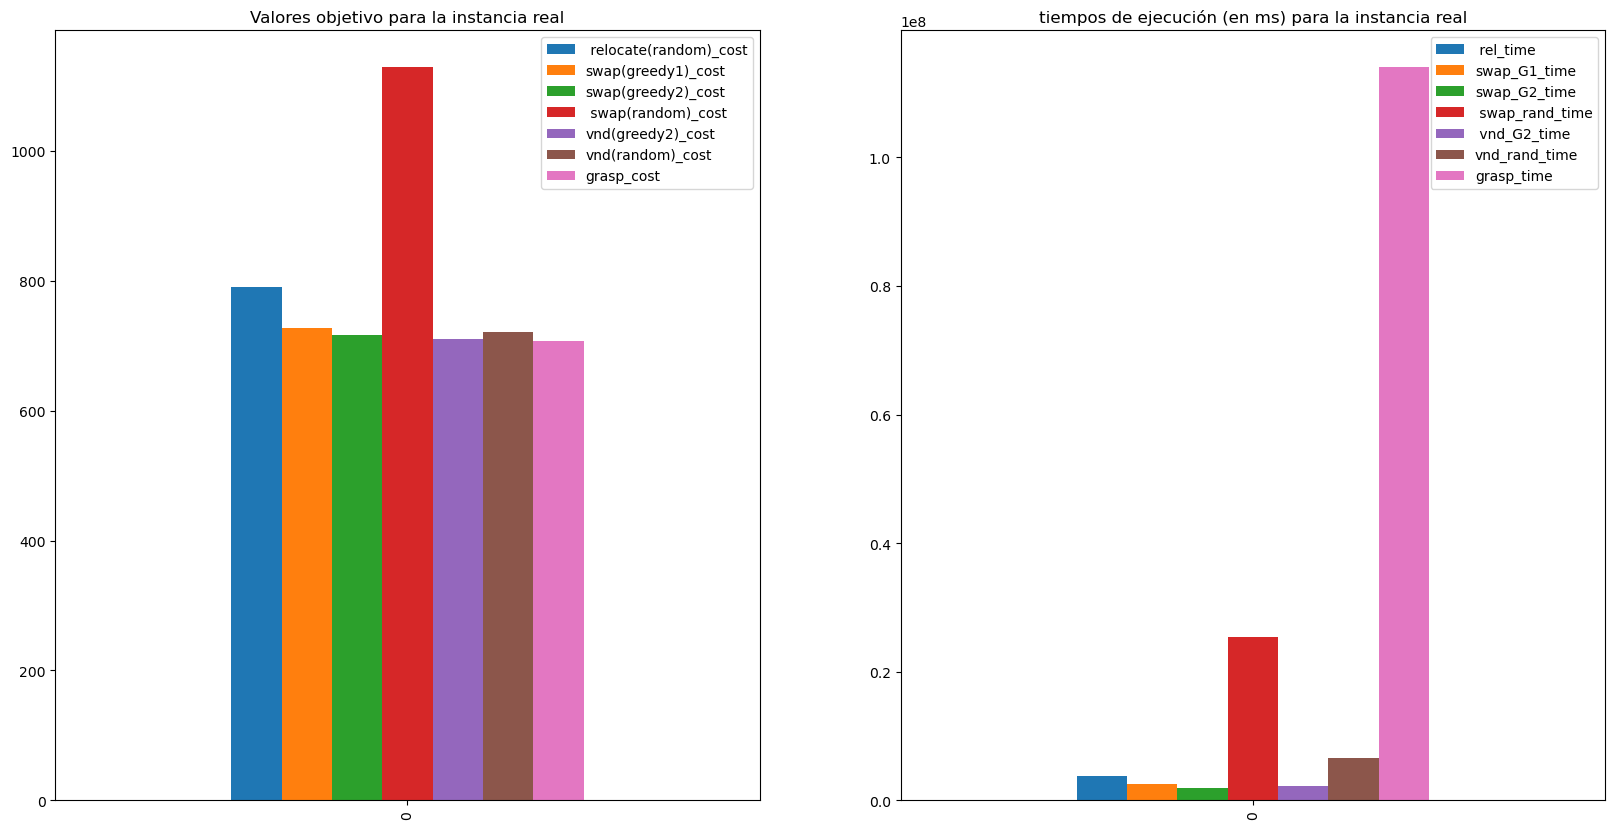

In [117]:
#graficar ambos graficos, uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
datos_r.plot.bar(y=[' relocate(random)_cost','swap(greedy1)_cost', 'swap(greedy2)_cost',' swap(random)_cost', 'vnd(greedy2)_cost', 'vnd(random)_cost',"grasp_cost"], ax=ax1)
ax1.set_title('Valores objetivo para la instancia real')
ax1.set_xlabel('')

datos_r.plot.bar(y=[' rel_time', 'swap_G1_time','swap_G2_time', ' swap_rand_time', ' vnd_G2_time', 'vnd_rand_time','grasp_time'], ax=ax2)
ax2.set_title('tiempos de ejecución (en ms) para la instancia real')
ax2.set_xlabel('')
plt.show()

